In [1]:
import pandas as pd
import statsmodels.graphics.tsaplots as tsa_plots
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"cement.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     96 non-null     object 
 1   month                    96 non-null     int64  
 2   GDP_Construction_Rs_Crs  96 non-null     int64  
 3   GDP_Real Estate_Rs_Crs   96 non-null     int64  
 4   Oveall_GDP_Growth%       96 non-null     float64
 5   water_source             96 non-null     float64
 6   limestone                96 non-null     float64
 7   Coal                     96 non-null     float64
 8   Home_Interest_Rate       96 non-null     float64
 9   Trasportation_Cost       96 non-null     float64
 10  Population               96 non-null     float64
 11  demand                   96 non-null     float64
 12  sale                     96 non-null     float64
 13  unit_price               96 non-null     float64
 14  Total_Price              96 

In [3]:
df.columns

Index(['date', 'month', 'GDP_Construction_Rs_Crs', 'GDP_Real Estate_Rs_Crs',
       'Oveall_GDP_Growth%', 'water_source', 'limestone', 'Coal',
       'Home_Interest_Rate', 'Trasportation_Cost', 'Population', 'demand',
       'sale', 'unit_price', 'Total_Price'],
      dtype='object')

In [4]:
df.drop(columns={'month', 'GDP_Construction_Rs_Crs', 'GDP_Real Estate_Rs_Crs',
       'Oveall_GDP_Growth%', 'water_source', 'limestone', 'Coal',
       'Home_Interest_Rate', 'Trasportation_Cost', 'Population',
       'unit_price', 'Total_Price'},inplace =True)

In [5]:
Train = df.head(85)
Test = df.tail(12)

In [6]:
df1 = pd.read_csv('test_arima.csv', index_col = 0)

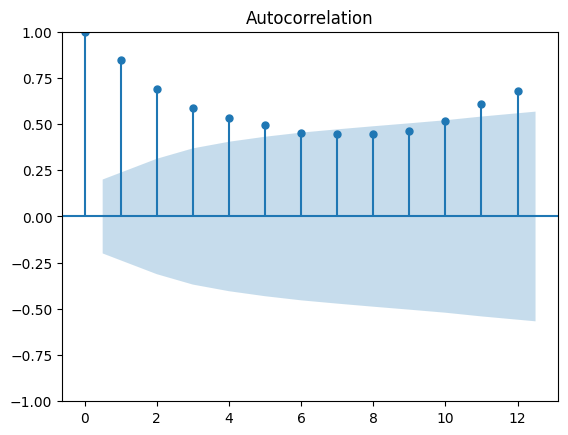

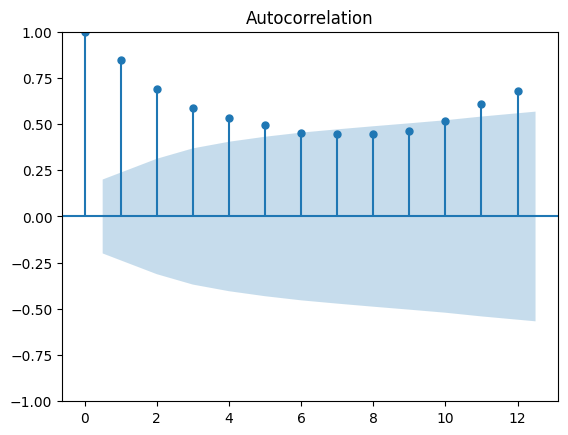

In [7]:
tsa_plots.plot_acf(df.demand, lags = 12)

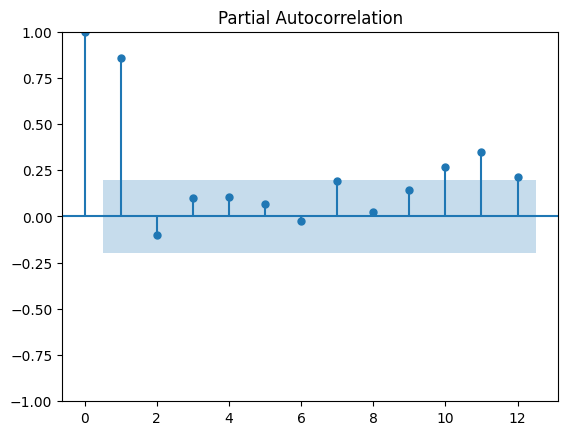

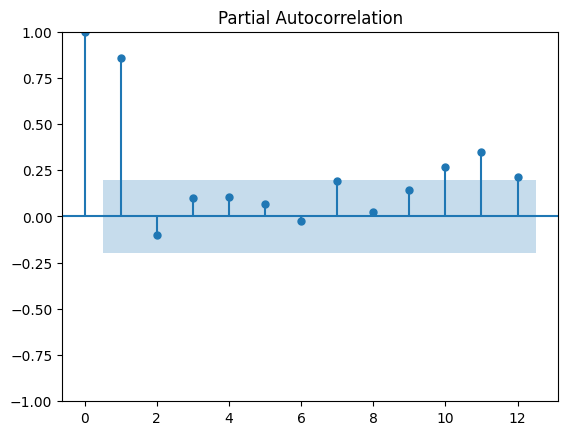

In [8]:
tsa_plots.plot_pacf(df.demand, lags = 12)

In [9]:
# ARIMA with AR = 12, MA = 5
model1 = ARIMA(Train.demand, order = (12, 1, 5))

In [10]:
res1 = model1.fit()
print(res1.summary())

                               SARIMAX Results                                
Dep. Variable:                 demand   No. Observations:                   85
Model:                ARIMA(12, 1, 5)   Log Likelihood                 -53.313
Date:                Thu, 02 Feb 2023   AIC                            142.627
Time:                        09:06:00   BIC                            186.381
Sample:                             0   HQIC                           160.216
                                 - 85                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0664      0.203     -0.327      0.744      -0.465       0.332
ar.L2         -0.0787      0.203     -0.387      0.699      -0.477       0.319
ar.L3         -0.1402      0.182     -0.770      0.4

In [11]:
# Forecast for next 12 months
start_index = len(Train)
start_index
end_index = start_index + 11
forecast_test = res1.predict(start = start_index, end = end_index)

In [12]:
print (forecast_test)

85    7.991960
86    7.127097
87    7.076870
88    7.200413
89    7.188912
90    5.872969
91    6.254133
92    6.724382
93    6.971305
94    7.109319
95    8.241076
96    8.789812
Name: predicted_mean, dtype: float64


In [13]:
# Evaluate forecasts
rmse_test = sqrt(mean_squared_error(Test.demand, forecast_test))
print('Test RMSE: %.3f' % rmse_test)

Test RMSE: 0.941


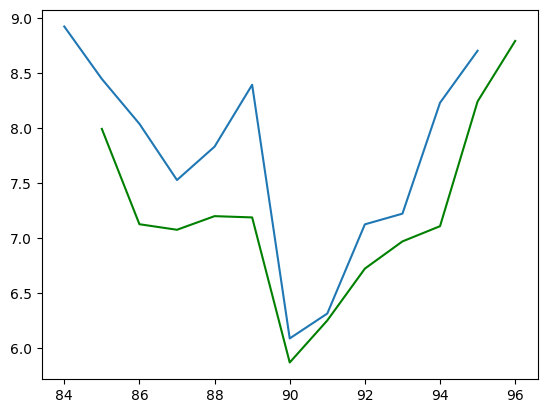

In [14]:
# plot forecasts against actual outcomes
pyplot.plot(Test.demand)
pyplot.plot(forecast_test, color = 'green')
pyplot.show()

In [15]:
import pmdarima as pm
from pmdarima import auto_arima

In [16]:
ar_model = pm.auto_arima(Train.demand,start_p = 0,start_q =0,
                      max_p =12 , max_q = 12, # maximum p and q
                      m = 1,              # frequency of series
                      d = None,           # let model determine 'd'
                      seasonal =False,  # No Seasonality
                      start_P = 0, trace = True,
                      error_action = 'warn', stepwise = True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=217.956, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=219.843, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=219.804, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=216.227, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=221.516, Time=0.08 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.200 seconds


In [17]:
stepwise_fit = auto_arima(df['demand'],trace = True,
                         suppress_warnings = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=229.505, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=246.136, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=248.094, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=248.076, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=244.350, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=229.652, Time=0.13 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] intercept
Total fit time: 2.738 seconds


In [18]:
model = ARIMA(Train.demand, order = (2,1,2))
res = model.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                 demand   No. Observations:                   85
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 -97.727
Date:                Thu, 02 Feb 2023   AIC                            205.454
Time:                        09:06:05   BIC                            217.608
Sample:                             0   HQIC                           210.340
                                 - 85                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5915      0.104     15.352      0.000       1.388       1.795
ar.L2         -0.8191      0.072    -11.340      0.000      -0.961      -0.678
ma.L1         -1.7808      0.114    -15.583      0.0

In [19]:
# Forecast for next 12 months
start_index = len(Train)
end_index = start_index + 11
forecast_best = res.predict(start = start_index, end = end_index)

In [20]:
print(forecast_best)

85    8.693005
86    8.263494
87    7.766695
88    7.327874
89    7.036443
90    6.932088
91    7.004728
92    7.205815
93    7.466337
94    7.716237
95    7.900547
96    7.989170
Name: predicted_mean, dtype: float64


In [21]:
rmse_best = sqrt(mean_squared_error(Test.sale, forecast_best))
print('Test RMSE: %.3f' % rmse_best)

Test RMSE: 0.702


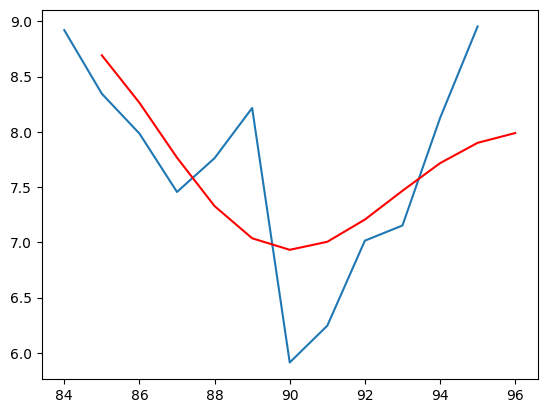

In [22]:
pyplot.plot(Test.sale)
pyplot.plot(forecast_best, color = 'red')
pyplot.show()

In [23]:
print('Test RMSE with Auto-ARIMA: %.3f' % rmse_best)

Test RMSE with Auto-ARIMA: 0.702


In [24]:
print('Test RMSE with out Auto-ARIMA: %.3f' % rmse_test)

Test RMSE with out Auto-ARIMA: 0.941


In [25]:
res1.save("model1.pickle")
from statsmodels.regression.linear_model import OLSResults
model = OLSResults.load("model1.pickle")

In [26]:
start_index = len(df)
end_index = start_index + 11
forecast = model.predict(start = start_index, end = end_index)

In [27]:
print(forecast)

96     8.789812
97     7.930535
98     7.163580
99     7.114705
100    7.227654
101    7.068556
102    6.048274
103    6.414845
104    6.783694
105    7.018457
106    7.221215
107    8.163017
Name: predicted_mean, dtype: float64
